### Import Data, Data Wrangling

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from collections import Counter
from scipy import stats
import datetime

In [2]:
df_books = pd.read_excel(r"pen_america_books.xlsx")
df_books.head()

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,Florida,Indian River County School District,2021-11-01,Administrator
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,2021-08-31,Administrator
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,2021-11-01,Administrator
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,2022-02-01,Administrator
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,2022-03-01,Administrator


In [3]:
df_other = pd.read_csv("books_1.Best_Books_Ever.csv")
df_other.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
df_allbooks = pd.merge(df_books, df_other, left_on="Title", right_on="title")
df_allbooks.head()

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,2021-08-31,Administrator,...,NaN,[],27237,"['13752', '10613', '2506', '277', '89']",99.0,"['New York City, New York (United States)', 'D...",https://i.gr-assets.com/images/S/compressed.ph...,99,1,8.24
1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,2021-11-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,2022-02-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
3,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,2022-03-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
4,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Virginia,New Kent County Public Schools,2021-10-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN


In [5]:
# number of banned books also in df_other
print(df_allbooks.shape[0])

720


In [6]:
# list of column names in merged dataframe
for col in df_allbooks.columns:
    print(col)

Author
Title
Type of Ban
Secondary Author(s)
Illustrator(s)
Translator(s)
State
District
Date of Challenge/Removal
Origin of Challenge
bookId
title
series
author
rating
description
language
isbn
genres
characters
bookFormat
edition
pages
publisher
publishDate
firstPublishDate
awards
numRatings
ratingsByStars
likedPercent
setting
coverImg
bbeScore
bbeVotes
price


In [7]:
# drop redundant columns
df_allbooks.drop(columns=['title', 'author'], inplace=True)

## Question 1:  Which books are banned most frequently, and why are they banned?


In [8]:
#How many books in the dataset
print(len(df_allbooks['Title'].unique()))

#Books banned in order of frequency
title_bans = df_allbooks.groupby('Title').size().sort_values(ascending=False)
#10 most frequently banned books
title_bans[:10]

#quick test
#mask56 = (df_allbooks['Title'] == "The Hate U Give")
#df_allbooks[mask56]['genres']

266


Title
Lucky                                              24
The Bluest Eye                                     22
The Hate U Give                                    17
The Absolutely True Diary of a Part-Time Indian    16
Me and Earl and the Dying Girl                     14
Sold                                               14
The Kite Runner                                    12
Monster                                            12
l8r, g8r                                           12
Almost Perfect                                     12
dtype: int64

In [9]:
#Compiling this information with book descriptions and genres
title_df = title_bans.to_frame(name="count")
relevant_info = pd.DataFrame().assign(Title=df_allbooks['Title'], genres=df_allbooks['genres'], description=df_allbooks['description'])
relevant_info.head()

#Dataframe with description info
why_banned_descriptions = pd.merge(relevant_info, title_df, on="Title")

#Dataframe with just genres and unique Title entries
why_banned_genres = why_banned_descriptions.drop_duplicates(subset="Title", keep="last")
why_banned_genres = why_banned_genres.sort_values(by="count", ascending=False)
why_banned_genres.head()

,Title,genres,description,count
585,Lucky,"['Young Adult', 'Chick Lit', 'Contemporary', '...",The bash at the Miller farm was the hottest pa...,24
421,The Bluest Eye,"['Fiction', 'Classics', 'Historical Fiction', ...","The Bluest Eye is Toni Morrison's first novel,...",22
683,The Hate U Give,"['Young Adult', 'Fiction', 'Contemporary', 'Au...",An alternate cover edition of ISBN 97800624985...,17
24,The Absolutely True Diary of a Part-Time Indian,"['Young Adult', 'Fiction', 'Contemporary', 'Re...",Bestselling author Sherman Alexie tells the st...,16
48,Me and Earl and the Dying Girl,"['Young Adult', 'Contemporary', 'Fiction', 'Hu...",Greg Gaines is the last master of high school ...,14


In [10]:
#Top 10 banned books analysis
top_banned = why_banned_genres[:10]
lst = []
for genre in top_banned['genres']:
    lst = genre.split("['")

print(lst)

['', "Fiction', 'Historical Fiction', 'Contemporary', 'Classics', 'Novels', 'Historical', 'Literature', 'Adult', 'Adult Fiction', 'Drama']"]


## Question 2: Have trends in book bans changed over time, and if so, how? 

In [11]:
# count number of challenges for each unique date
date_counts = df_allbooks.groupby('Date of Challenge/Removal').count()['Author']
date_counts = date_counts.to_frame()


In [12]:
# dataframe of the dates, for merging
unique_dates = pd.DataFrame(df_allbooks['Date of Challenge/Removal'].unique())
unique_dates = unique_dates.rename(columns = {0 : "Date"})


In [13]:
# create dataframe with dates and counts in order to plot
merge_dates = unique_dates.merge(date_counts, how='left', left_on = 'Date', right_on = 'Date of Challenge/Removal')
merge_dates.fillna(0, inplace = True)

merge_dates = merge_dates.sort_values(by = 'Date')

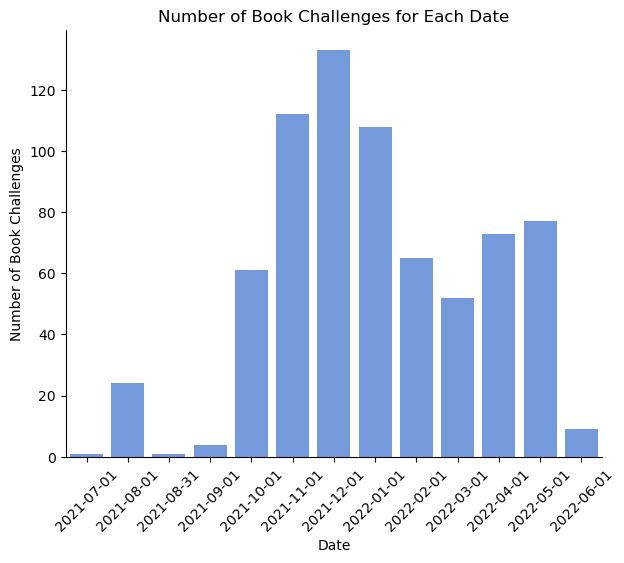

In [14]:
# plot number of bans for each unique date

sns.catplot(data = merge_dates, kind = "bar", x = "Date", y = "Author", color = "cornflowerblue",  
            aspect = 1.5)

plt.xlabel("Date")
plt.xticks(rotation = 45)

# fix labels on x axis to remove timestamp
labels = [tick.get_text()[:10] for tick in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(labels)

plt.ylabel("Number of Book Challenges")

plt.title("Number of Book Challenges for Each Date")

plt.show()


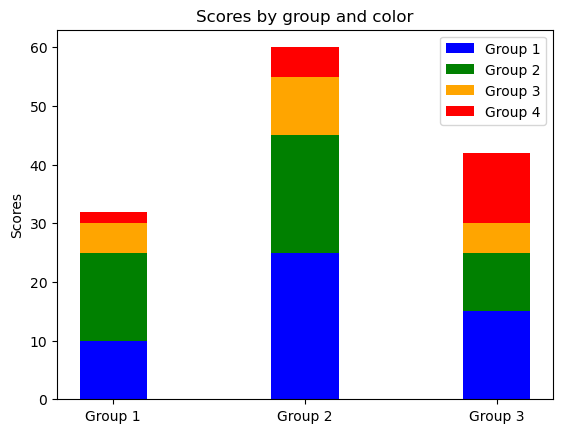

In [15]:
labels = ['Group 1', 'Group 2', 'Group 3']
colors = ['blue', 'green', 'orange', 'red']
data = [[10, 15, 5, 2], [25, 20, 10, 5], [15, 10, 5, 12]]

fig, ax = plt.subplots()

width = 0.35  # the width of the bars
x = np.arange(len(labels))  # the label locations

# convert data to a numpy array
data = np.array(data)

# plot the bars using bar function
for i in range(len(colors)):
    ax.bar(x, data[:, i], width, bottom=np.sum(data[:, :i], axis=1), color=colors[i], label=f'Group {i+1}')

# Add text for labels and title
ax.set_ylabel('Scores')
ax.set_title('Scores by group and color')

# Set ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


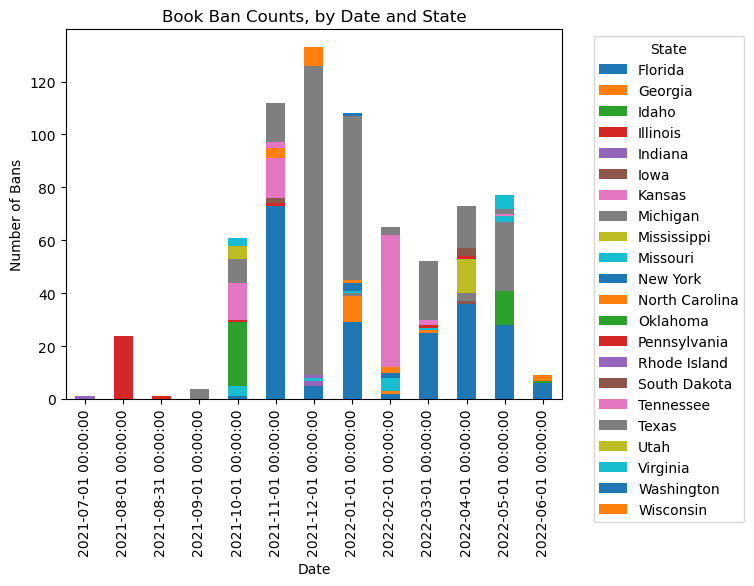

In [16]:
group_date_state = df_allbooks.groupby(['Date of Challenge/Removal', 'State']).size().reset_index(name='count')
pivot_group = group_date_state.pivot(index='Date of Challenge/Removal', columns='State', values='count')
pivot_group.plot(kind='bar', stacked=True)

plt.title('Book Ban Counts, by Date and State')
plt.xlabel('Date')
plt.ylabel('Number of Bans')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Question 3: How do trends in banned books vary by genre? 

In [17]:
# convert string of genres to list
import ast
def convert_to_list(x):
    return ast.literal_eval(x)
df_allbooks['genres'] = df_allbooks['genres'].apply(convert_to_list)

In [18]:
# count occurrences of each genre
genre_counts = Counter([genre for genres in df_allbooks['genres'] for genre in genres])
df_genre_counts = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count'])
df_genre_counts = df_genre_counts.sort_values(by='count', ascending=False)
df_genre_counts = df_genre_counts.reset_index().rename(columns={'index': 'genre'})

df_genre_counts.head(10)

,genre,count
0,Fiction,607
1,Young Adult,458
2,Contemporary,456
3,Realistic Fiction,365
4,Teen,277
5,Romance,273
6,Audiobook,226
7,LGBT,212
8,Queer,161
9,Young Adult Contemporary,149


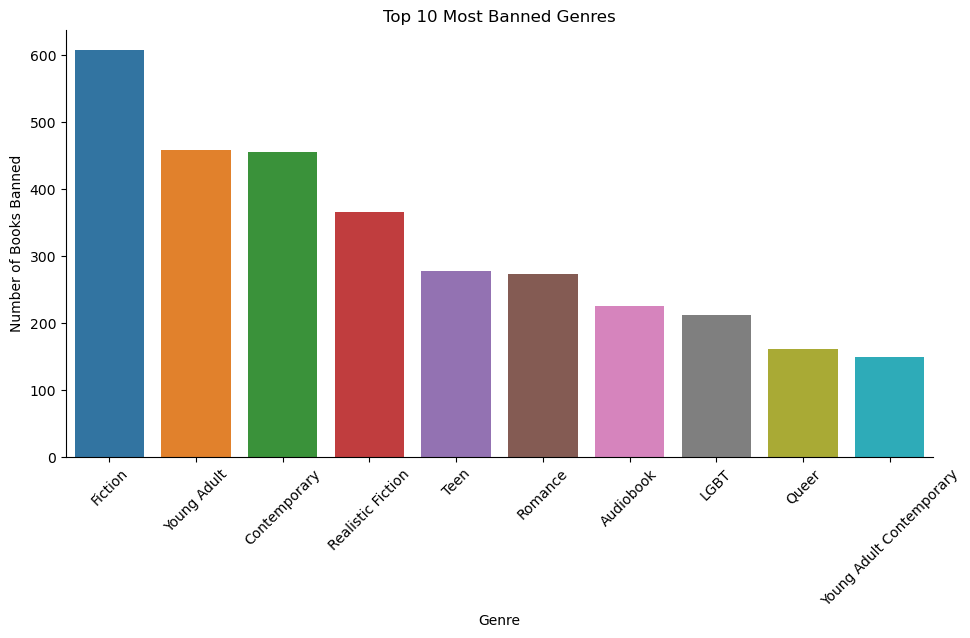

In [19]:
# plot 10 most banned genres
sns.catplot(data = df_genre_counts.head(10), x = 'genre', y = 'count', kind = 'bar', aspect = 2)
plt.xticks(rotation = 45)
plt.xlabel("Genre")
plt.ylabel("Number of Books Banned")
plt.title("Top 10 Most Banned Genres")
plt.show()

## Question 4: How do trends in book banning vary by state? 

For this step of analysis, we will be using the original PEN America (`df_books`) data rather than the merged dataframe with extra information on the books (`df_allbooks`), since we are interested in number of bans per state.

Our definition of regions is based on regions defined by the U.S. Census Bureau. State populations are also based on information from the U.S. Census Bureau. 

In [20]:
# which states had most bans
state_bans = df_books.groupby('State').count().sort_values(by = 'Author', ascending = False)
most_bans = state_bans.head()['Author'].to_frame()
most_bans = most_bans.rename(columns = {'Author': 'Number of Bans'})
most_bans

,Number of Bans
State,
Texas,801
Florida,566
Pennsylvania,458
Tennessee,349
Oklahoma,43


In [21]:
# which states had fewest bans
fewest_bans = state_bans.tail(10)['Author'].to_frame()
fewest_bans = fewest_bans.rename(columns = {'Author' : 'Number of Bans'})
fewest_bans

,Number of Bans
State,
New Jersey,3
Arkansas,1
Minnesota,1
Oregon,1
Maryland,1
Rhode Island,1
South Carolina,1
Maine,1
Vermont,1


In [22]:
# create dataframe with just northeast states
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
northeast_df = df_books[df_books['State'].isin(northeast)]

# count number of bans per state
northeast_df_counts = northeast_df.groupby('State').count()['Author']
northeast_counts = northeast_df_counts.to_frame()
northeast_counts = northeast_counts.rename(columns = {'Author' : "Number of Bans"})

# calculate mean number of bans per state
ne_mean = np.mean(northeast_counts['Number of Bans'])

In [23]:
# create dataframe with just southern states
south = ['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
south_df = df_books[df_books['State'].isin(south)]

# count number of bans per state
south_df_counts = south_df.groupby('State').count()['Author']
south_counts = south_df_counts.to_frame()
south_counts = south_counts.rename(columns = {'Author' : "Number of Bans"})

# calculate mean number of bans per state
south_mean = np.mean(south_counts['Number of Bans'])

Now, we will conduct a hypothesis test to determine whether the difference in mean number of banned books per state for northeastern states and southern states is statistically significant. 

$H_0: \mu_1 - \mu_2 = 0$

$H_A: \mu_1 - \mu_2 \ne 0$


**Null hypothesis:** there is no evidence of a statistically significant difference in mean number of banned books per state for northeastern states and southern states. 


**Alternative hypothesis:** there is evidence of a statistically significant difference in mean number of banned books per state for northeastern states and southern states. 

## Question 5: Who initiates book challenges and why? 


In this portion, we will group the books by their "origin of challenge" (who first proposed a book be banned; either from school administration, a formal challenge made by a parent or local resident, or other) and assess the demographic information of each books in each category in order to determine whether there is some underlying reason behind why a certain group of people challenges a book. 

In [24]:
df_allbooks = pd.merge(df_books, df_other, left_on="Title", right_on="title")
df_allbooks.head()

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,2021-08-31,Administrator,...,NaN,[],27237,"['13752', '10613', '2506', '277', '89']",99.0,"['New York City, New York (United States)', 'D...",https://i.gr-assets.com/images/S/compressed.ph...,99,1,8.24
1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,2021-11-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,2022-02-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
3,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,2022-03-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN
4,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Virginia,New Kent County Public Schools,2021-10-01,Administrator,...,NaN,"[""National Book Award for Young People's Liter...",62484,"['35118', '20527', '5149', '1021', '669']",97.0,"['Harlem, New York City, New York (United Stat...",https://i.gr-assets.com/images/S/compressed.ph...,376,4,NaN


In [25]:
#the total number of bans by origin of challenge
df_allbooks.groupby("Origin of Challenge").count()

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,bookId,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
Origin of Challenge,,,,,,,,,,,,,,,,,,,,,
Administrator,646,646,646,11,44,3,646,646,646,646,...,281,646,646,646,646,646,646,646,646,536
Formal Challenge,71,71,71,1,8,0,71,71,71,71,...,32,71,71,71,71,71,71,71,71,64
Other,3,3,3,0,0,0,3,3,3,3,...,2,3,3,3,3,3,3,3,3,2


In [26]:
#information about books grouped by origin of challenge
df_allbooks.groupby("Origin of Challenge").mean()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
Origin of Challenge,,,,,
Administrator,4.033313,214056.379257,92.332817,46778.657895,508.952012
Formal Challenge,4.011831,288177.366197,91.661972,46814.971831,511.802817
Other,4.100000,349776.666667,94.333333,14917.333333,180.333333


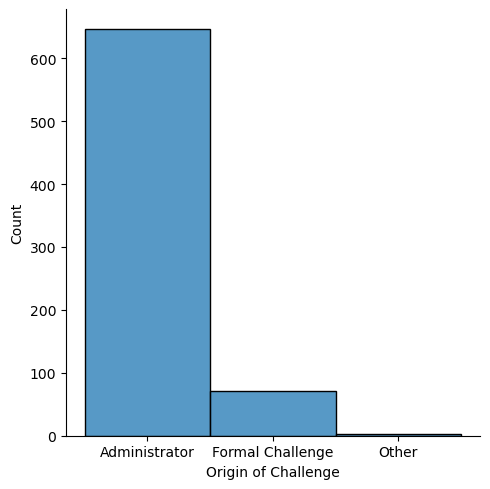

In [27]:
##plot showing total number of bans by origin of challenge
sns.displot(data=df_allbooks, x="Origin of Challenge")
plt.show()

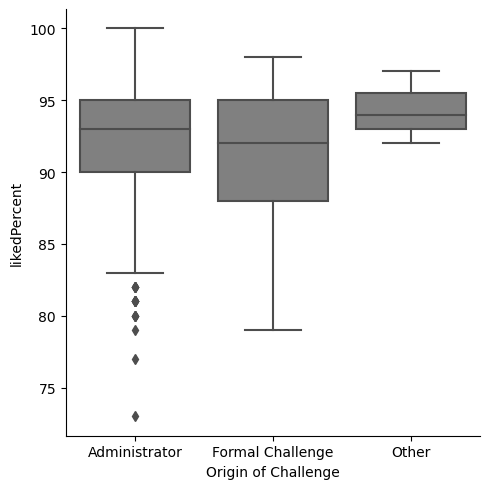

In [28]:
##plot displaying the distribution of the liked perecentage by origin of 
sns.catplot(data = df_allbooks, x = "Origin of Challenge", y = "likedPercent", kind = "box", color = "gray")
plt.show()

Now that we have established that there may be some difference in the liked percentage between the three orgins of challenge categories, we will conduct a hypothesis test to determine whether the difference in mean like percentange for administrator banned books and formal challenge banned books is statistically significant. 

$H_0: \mu_{admin} = \mu_{formal}$

$H_A:\mu_{admin} \neq \mu_{formal}$


**Null hypothesis:** there is no evidence of a statistically significant difference in mean like percentange for administrator banned books and formal challenge banned books.


**Alternative hypothesis:** there is evidence of a statistically significant difference in mean like percentange for administrator banned books and formal challenge banned books.

In [29]:
mask1 = df_allbooks["Origin of Challenge"] == "Administrator"
mask2 = df_allbooks["Origin of Challenge"] == "Formal Challenge"

admin = df_allbooks[mask1]["likedPercent"].tolist()
formal = df_allbooks[mask2]["likedPercent"].tolist()

stats.ttest_ind(admin, formal, equal_var = False)

Ttest_indResult(statistic=1.1135568501389614, pvalue=0.2687073133497532)

Our p-value is 0.269 which is much greater than our predetermined significance level of 0.05. Thus, we fail to reject the null hypothesis there is no evidence of a statistically significant difference in mean like percentange for administrator banned books and formal challenge banned books. We have insufficient evidence to suggest a statistically significant difference in mean like percentange for administrator banned books and formal challenge banned books.